In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("Gasoil") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,LGOc1,LGOc3,LGOc6,LGOc9,LGOc12
Timestamp,,,,,
1988-06-30,128.75,128.00,133.50,131.50,NaN
1988-07-31,137.50,139.50,140.25,139.00,NaN
1988-08-31,127.75,132.50,129.50,125.00,NaN
1988-09-30,110.75,113.75,113.50,112.50,NaN
1988-10-31,120.75,121.25,113.50,113.13,NaN


<AxesSubplot:xlabel='Timestamp'>

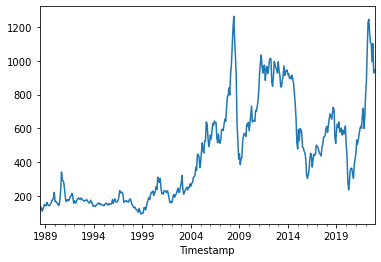

In [3]:
spot = df1["LGOc1"]
#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count     415.000000
mean      443.368675
std       292.224335
min        94.500000
25%       177.625000
50%       370.250000
75%       626.375000
max      1262.500000
Name: LGOc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.7294346972646193
Skewness logs: 0.03027010199009381
Kurtosis spot: 2.435860267700549
Kurtosis logs: 1.62092806180691
JB spot: Jarque_beraResult(statistic=42.304988431624885, pvalue=6.510112449120697e-10)
JB logs: Jarque_beraResult(statistic=32.94934911287449, pvalue=7.000672297419186e-08)
Q(6) spot:        lb_stat  lb_pvalue
6  2117.995028        0.0
Q(6) logs:        lb_stat  lb_pvalue
6  2231.142032        0.0


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.0752974614642357, 0.2545629087362926, 2, 412, {'1%': -3.4463221132914486, '5%': -2.8685808072418824, '10%': -2.570520529031954}, 4167.5665308141)
ADF logs: (-1.6650224136934217, 0.4492180580298282, 1, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, -721.0410908583185)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.619
P-value                         0.473
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.487
P-value                         0.540
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process 

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  2.144
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  2.519
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


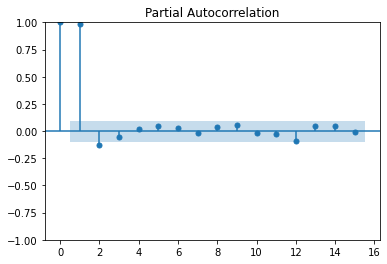

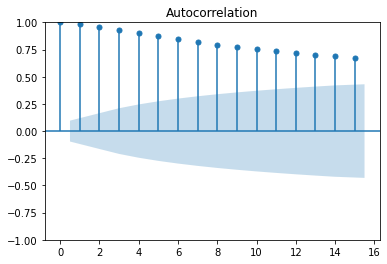

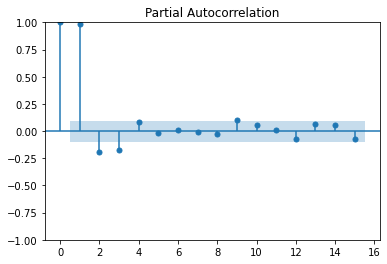

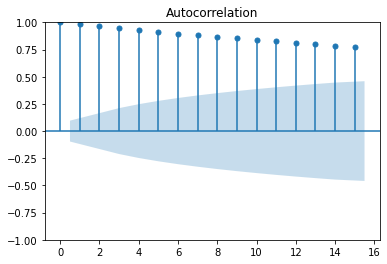

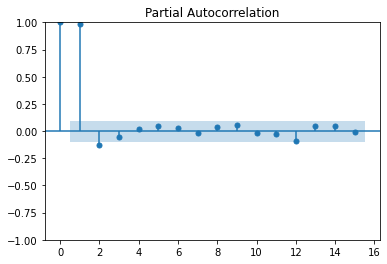

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

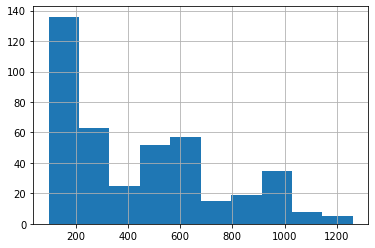

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

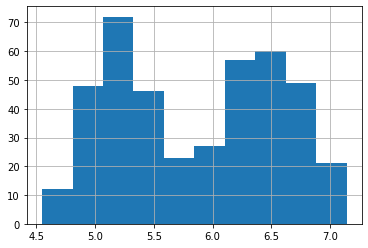

In [10]:
np.log(spot).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=300)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3054.168, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3070.754, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3050.603, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3054.758, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3069.781, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3050.923, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3051.505, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3052.866, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3049.199, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3049.423, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3049.986, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3053.491, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3051.074, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.542 seconds


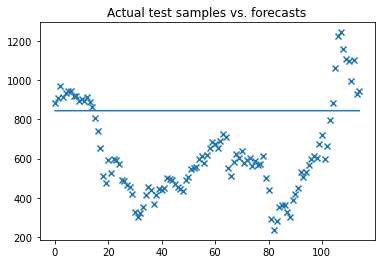

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1522.599
Date:                Tue, 27 Dec 2022   AIC                           3049.199
Time:                        18:49:51   BIC                           3056.600
Sample:                             0   HQIC                          3052.161
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2686      0.038      7.127      0.000       0.195       0.342
sigma2      1554.6868     68.383     22.735      0.000    1420.658    1688.716
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               569.33
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               9.88   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

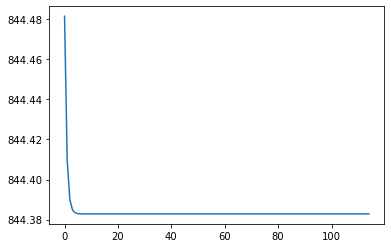

In [14]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [15]:
arima.predict(n_periods=test.shape[0])

array([844.48144709, 844.40932642, 844.38995821, 844.38475682,
       844.38335997, 844.38298484, 844.3828841 , 844.38285705,
       844.38284978, 844.38284783, 844.38284731, 844.38284717,
       844.38284713, 844.38284712, 844.38284712, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38284711,
       844.38284711, 844.38284711, 844.38284711, 844.38

<AxesSubplot:xlabel='Timestamp'>

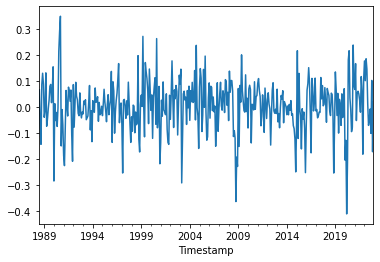

In [16]:
spot2 = np.log(spot).diff()
spot2.plot()

In [17]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    414.000000
mean       0.004813
std        0.097790
min       -0.409726
25%       -0.043491
50%        0.008171
75%        0.065143
max        0.348551
Name: LGOc1, dtype: float64

In [18]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.3720254252910501
Kurtosis spot: 4.637487851364711
JB spot: Jarque_beraResult(statistic=55.80337277042715, pvalue=7.628342402199451e-13)
Q(6) spot:      lb_stat  lb_pvalue
6  15.381965   0.017485


In [19]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-17.156788040070747, 6.884044887756816e-30, 0, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, -728.5831050693753)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -16.914
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.037
P-value                         0.949
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


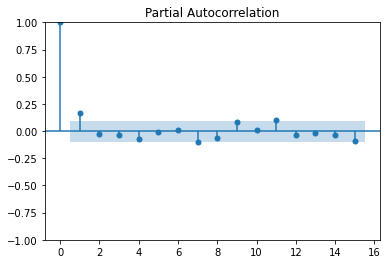

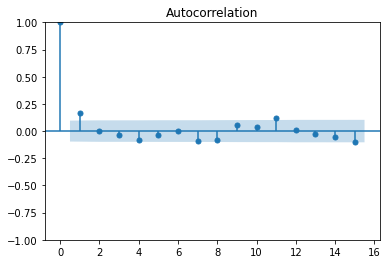

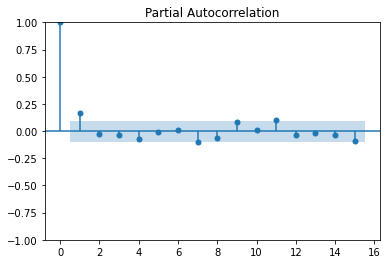

In [21]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

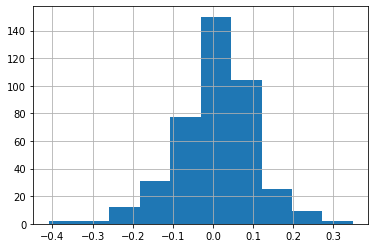

In [22]:
spot2.hist()


In [23]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=300)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-557.276, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-559.784, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-563.278, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-563.158, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-561.277, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-561.273, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-559.278, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-562.350, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.291 seconds


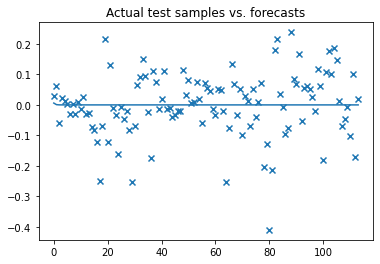

In [24]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [25]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 283.639
Date:                Tue, 27 Dec 2022   AIC                           -563.278
Time:                        18:49:53   BIC                           -555.871
Sample:                             0   HQIC                          -560.314
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1349      0.043      3.114      0.002       0.050       0.220
sigma2         0.0088      0.001     15.596      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.22
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.25
Prob(H) (two-sided):                  0.53   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

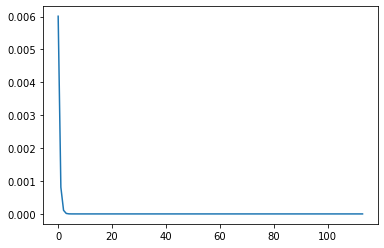

In [26]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [27]:
arima2.predict(n_periods=test2.shape[0])

array([6.01114721e-003, 8.10766626e-004, 1.09353922e-004, 1.47493494e-005,
       1.98935075e-006, 2.68318033e-007, 3.61899815e-008, 4.88120291e-009,
       6.58362917e-010, 8.87981382e-011, 1.19768431e-011, 1.61540291e-012,
       2.17881000e-013, 2.93871763e-014, 3.96365968e-015, 5.34607267e-016,
       7.21063243e-017, 9.72549819e-018, 1.31174784e-018, 1.76924858e-019,
       2.38631272e-020, 3.21859147e-021, 4.34114563e-022, 5.85521511e-023,
       7.89734944e-024, 1.06517228e-024, 1.43667440e-025, 1.93774602e-026,
       2.61357732e-027, 3.52511957e-028, 4.75458212e-029, 6.41284661e-030,
       8.64946711e-031, 1.16661579e-031, 1.57349856e-032, 2.12229060e-033,
       2.86248586e-034, 3.86084041e-035, 5.20739293e-036, 7.02358510e-037,
       9.47321401e-038, 1.27772046e-038, 1.72335341e-039, 2.32441060e-040,
       3.13509963e-041, 4.22853419e-042, 5.70332797e-043, 7.69248833e-044,
       1.03754119e-044, 1.39940637e-045, 1.88747994e-046, 2.54577985e-047,
       3.43367625e-048, 4

In [28]:
#cointegration tests

#normalized cv
#LR test

In [29]:
#correlaatiomatriisi

In [30]:
#np.argwhere(np.isnan(x))